#### Cross-Validation: es una técnica estadística que se usa para estimar modelos de predicción. Es muy usada cuando tenemos sobreajustes.

- $k$-fold cross-validation: de nuestro conjunto de datos de entrenamiento inicial (train data), dividimos en pequeños $k$-subconjuntos de datos de entrenamiento y datos prueba.

- De esta forma, podemos evaluar nuestro modelo sobre conjuntos de datos no observable. 


In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
n_samples = X.shape[0]
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
X.shape 

(442, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [ ]:
X_train.shape

(353, 10)

In [ ]:
# Ajuste del modelo
lm =linear_model.LinearRegression() # cursor

modelo= lm.fit(X_train, y_train)

predicciones = lm.predict(X_test)  

Text(0, 0.5, 'Predicciones')

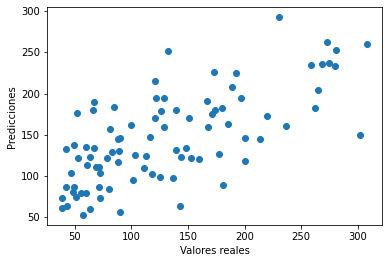

In [ ]:
plt.scatter(y_test, predicciones)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

In [ ]:
modelo.score(X_test, y_test)

0.42785467063548754

#### k-fold cross-validation
1.- Aplicar train/test split 

2.- Al conjunto train lo dividimos en $k$ subconjuntos y tomamos $k-1$ como conjunto de entrenamiento y $1$ para conjunto prueba.

3.- Repetimos lo anterior hasta obtener un mejor modelo.

In [ ]:
## Ejemplo de juguete

#import numpy as np 
#from sklearn.model_selection import KFold

#X = np.array([[1,2], [3,4], [5,6], [3,4] ])

#y = np.array([1, 2, 3, 4])

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1)

In [ ]:
#kf = KFold(n_splits = 2)
#kf.get_n_splits(X) 


In [ ]:
#kf.split(X)

In [ ]:
#for train_i, test_i in kf.split(X):
#  print("Train:", train_i, "Test:", test_i)
#  X_train, X_test = X[train_i], X[test_i] 
#  y_train, y_test = y[train_i], y[test_i]  


In [ ]:
#X_train, X_test = X[train_i], X[test_i] 
#y_train, y_test = y[train_i], y[test_i]  

In [ ]:
#X_train, y_train 

In [ ]:
# Continuación sobre el conjunto de datos original

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics 


In [ ]:
scores = cross_val_score(modelo, X, y, cv = 6)
scores 

array([0.4554861 , 0.46138572, 0.40094084, 0.55220736, 0.43942775,
       0.56923406])

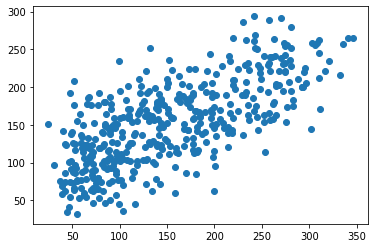

In [ ]:
predicciones = cross_val_predict(modelo, X, y, cv = 6)
plt.scatter(y,predicciones)

In [ ]:
precisión = metrics.r2_score(y, predicciones)

print("Precisión de la predicción cruzada:", precisión)

Precisión de la predicción cruzada: 0.4908065838640776


### LOOCV (Leave-One-Out Cross Validation)